In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import functions

#for detection/segmentation
# !pip install ultralytics
from ultralytics import YOLO

#for classificatcion
import keras

In [2]:
#det_model = YOLO("yolov8m.pt")
seg_model = YOLO("yolov8l-seg.pt")
cla_model = keras.models.load_model("n_data_aug_92.h5")

In [3]:
def get_seg(image):
    seg_res = seg_model(image)[0]
    seg_res_boxes = seg_res.boxes.cls.numpy()
    banana_box_idx = np.where(seg_res_boxes == 46.)[0]
    if banana_box_idx.size == 0:
        print("no banana found")
        return 0
    if banana_box_idx.size > 1:
        print("more than one banana found, not handled yet")
        return 0
    mask = np.zeros_like(image)
    mask = cv2.drawContours(mask, [seg_res.masks.xy[0].astype(int)], 0, (255,255,255), -1)
    seg_image = mask & image
    xyxy = seg_res.boxes.xyxy[0].numpy().astype(int)
    crop_image = seg_image[xyxy[1]:xyxy[3], xyxy[0]:xyxy[2] ]
    plt.figure()
    plt.imshow(crop_image)
    plt.show()
    return crop_image

def seg_n_class(image):
    seg_image = get_seg(image)
    if type(seg_image) == int:
        return 0
    t_image = functions.transform(seg_image)
    cla_result = cla_model.predict(t_image.reshape(1, 64,64,3))[0]
    print(cla_result)
    print(np.dot(np.array([0,1,2,3]), np.array(cla_result)))



0: 640x480 1 banana, 2964.2ms
Speed: 9.1ms preprocess, 2964.2ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)


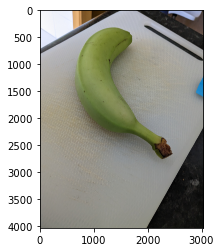

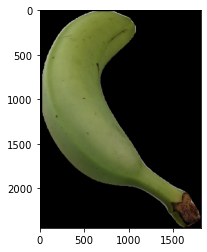

1/1 [==============================] - 0s 342ms/step
[          1  7.3391e-17  1.5591e-13  5.3502e-12]
1.6362562662507824e-11


In [4]:
img = plt.imread("Bananas time dataset/t0_0 (1).jpg")
plt.imshow(img)
seg_n_class(img)